# Batch Prediction

## 1. Download demo data

```
cd DeepDenoiser
wget https://github.com/wayneweiqiang/PhaseNet/releases/download/test_data/test_data.zip
unzip test_data.zip
```

## 2. Run batch prediction 

PhaseNet currently supports three data formats: numpy, hdf5, and mseed

- For numpy format:
~~~bash
python deepdenoiser/predict.py --model_dir=model/190614-104802 --data_list=test_data/npz.csv --data_dir=test_data/npz --format=numpy --save_signal --plot_figure
~~~

- For mseed format:
~~~bash
python deepdenoiser/predict.py --model_dir=model/190614-104802 --data_list=test_data/mseed.csv --data_dir=test_data/mseed --format=mseed --save_signal --plot_figure
~~~


Optional arguments:
```
usage: predict.py [-h] [--format FORMAT] [--epochs EPOCHS]
                  [--batch_size BATCH_SIZE] [--output_dir OUTPUT_DIR]
                  [--model_dir MODEL_DIR] [--sampling_rate SAMPLING_RATE]
                  [--data_dir DATA_DIR] [--data_list DATA_LIST]
                  [--plot_figure] [--save_signal] [--save_noise]

optional arguments:
  -h, --help            show this help message and exit
  --format FORMAT       Input data format: numpy or mseed
  --epochs EPOCHS       Number of epochs (default: 10)
  --batch_size BATCH_SIZE
                        Batch size
  --output_dir OUTPUT_DIR
                        Output directory (default: output)
  --model_dir MODEL_DIR
                        Checkpoint directory (default: None)
  --sampling_rate SAMPLING_RATE
                        sampling rate of pred data
  --data_dir DATA_DIR   Input file directory
  --data_list DATA_LIST
                        Input csv file
  --plot_figure         If plot figure
  --save_signal         If save denoised signal
  --save_noise          If save denoised noise
```

## 3. Read denoised signals

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
PROJECT_ROOT = os.path.realpath(os.path.join(os.path.abspath(''), ".."))

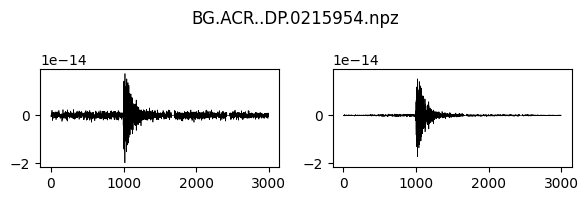

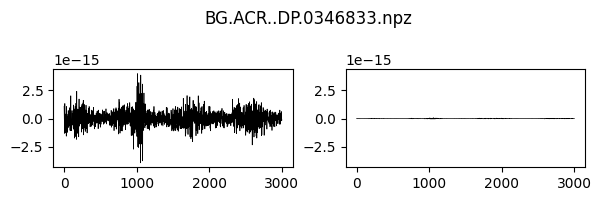

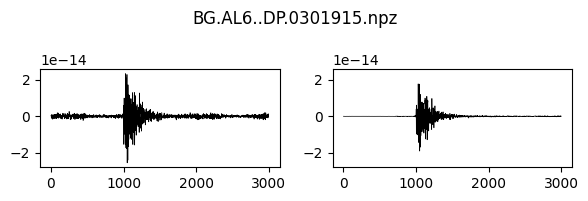

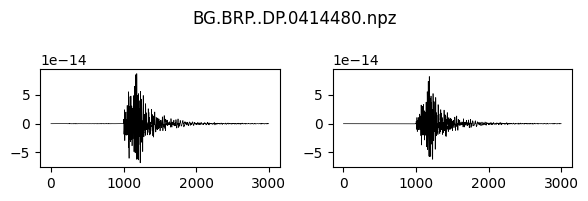

In [21]:
plt.close("all")
for i, fp in enumerate(sorted(glob.glob(os.path.join(PROJECT_ROOT, "output/results/*npz")))):
    signal = np.load(fp)["data"][5000:8000,-1,-1]
    raw_signal = np.load(os.path.join(PROJECT_ROOT, "test_data/npz/", fp.split("/")[-1]))["data"][5000:8000,-1]
    plt.figure(figsize=(6,2))
    plt.subplot(121)
    plt.plot(raw_signal, 'k', linewidth=0.5)
    ylim = plt.ylim()
    plt.subplot(122)
    plt.plot(signal, 'k', linewidth=0.5)
    plt.ylim(ylim)
    plt.suptitle(fp.split("/")[-1])
    plt.tight_layout()
    plt.show()
    if i >= 3:
        break
    